In [7]:
import importlib
import sys
import pandas as pd
import numpy as np

sys.path.append("../")
import biobss
import matplotlib.pyplot as plt
import neurokit2 as nk
from plotly_resampler import register_plotly_resampler

In [2]:
import os
os.getcwd()
import neurokit2 as nk
sample_data = pd.read_pickle("../sample_data/EDA_Chest.pkl")
sample_data = sample_data.flatten()

In [3]:
eda_raw=sample_data
eda_cleaned=biobss.edatools.eda_clean(eda_raw, sampling_rate=700)
decomposed=biobss.edatools.eda_decompose(eda_cleaned, sampling_rate=700,method='highpass')
tonic=np.array(decomposed['EDA_Tonic'])
phasic=np.array(decomposed['EDA_Phasic'])
timestamp=biobss.timetools.create_timestamp_signal(resolution='s',length=len(eda_raw),start=0,rate=700)

In [4]:
peaks=nk.eda_peaks(phasic, sampling_rate=700)
peaks=peaks[1]['SCR_Peaks']

In [8]:
register_plotly_resampler(mode='auto')
biobss.edatools.eda_plot_plotly(signals={'Raw':eda_raw,'Cleaned':eda_cleaned,'Tonic':tonic,'Phasic':phasic,'Peaks':peaks},sampling_rate=700,timestamp_resolution='ms',show_peaks=True)

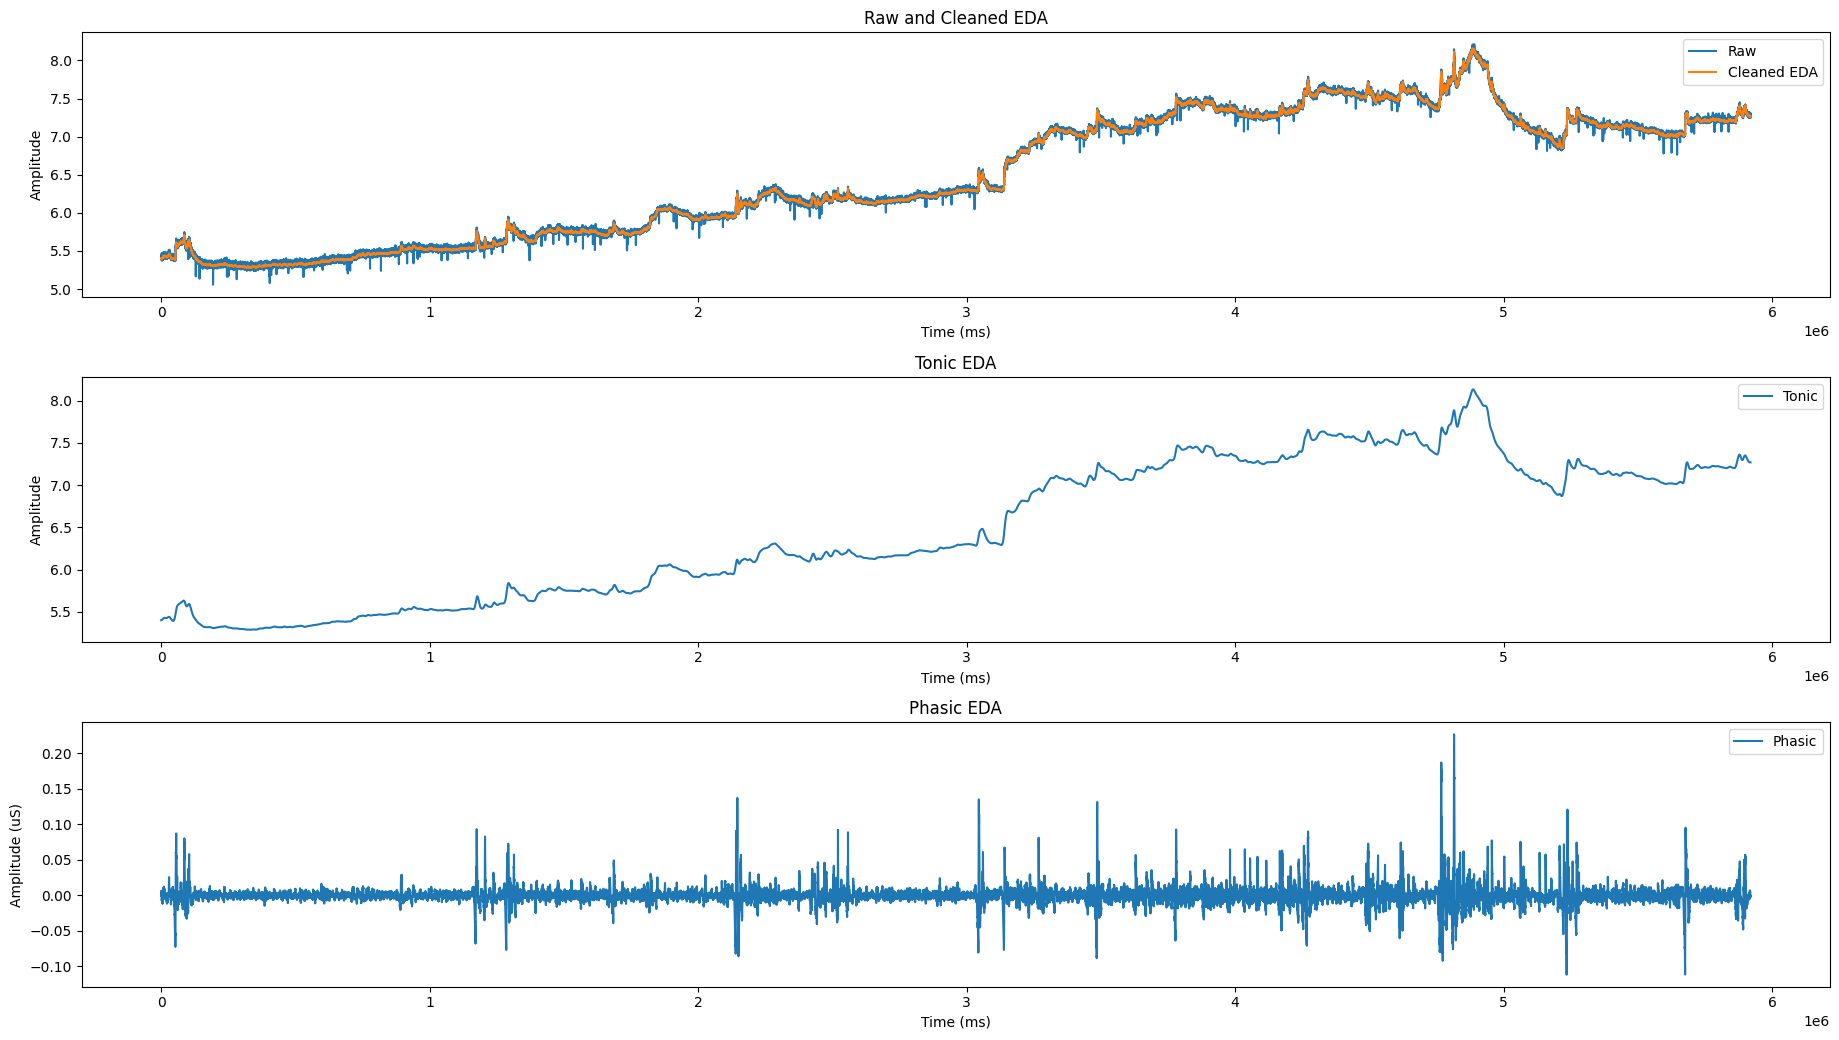

In [5]:
biobss.edatools.eda_plot(signals={'Raw':eda_raw,'Cleaned':eda_cleaned,'Tonic':tonic,'Phasic':phasic},sampling_rate=700)

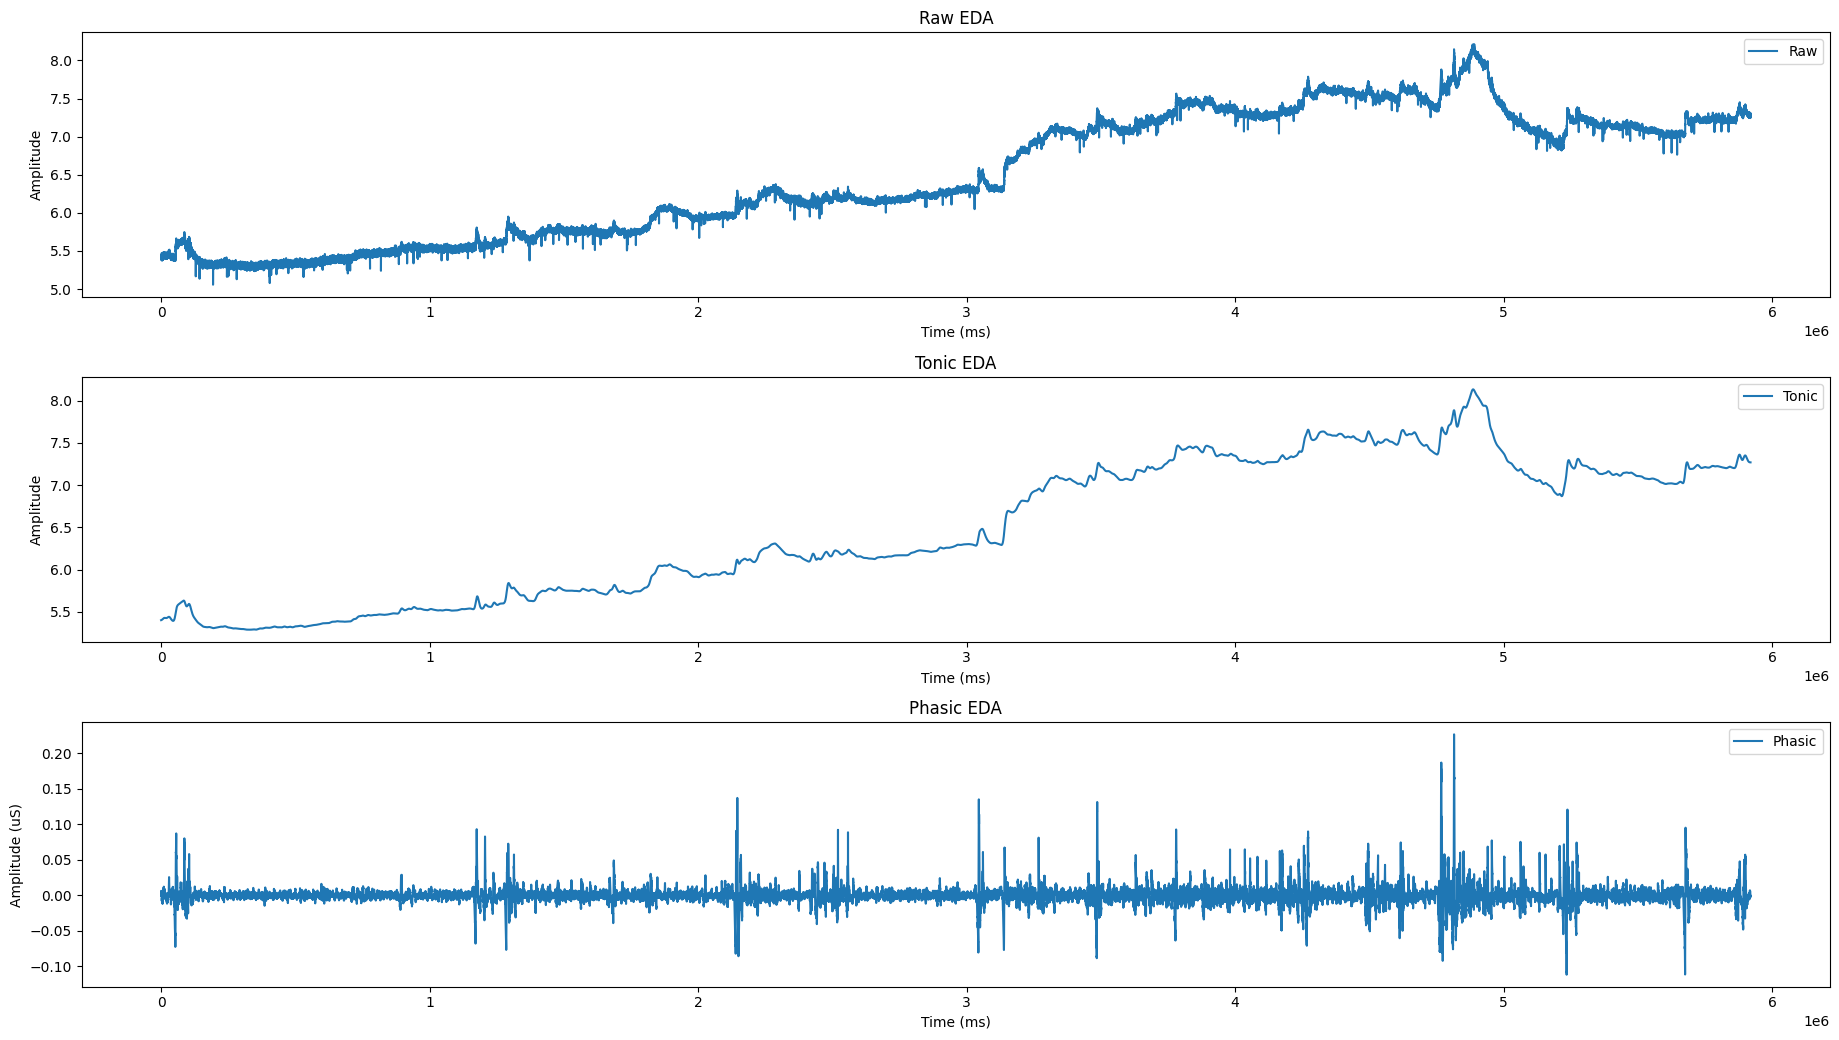

In [6]:
biobss.edatools.eda_plot(signals={'Raw':eda_raw,'Tonic':tonic,'Phasic':phasic},sampling_rate=700)

In [7]:
peaks=nk.eda.eda_peaks(phasic,sampling_rate=700)
peaks=peaks[1]['SCR_Peaks']

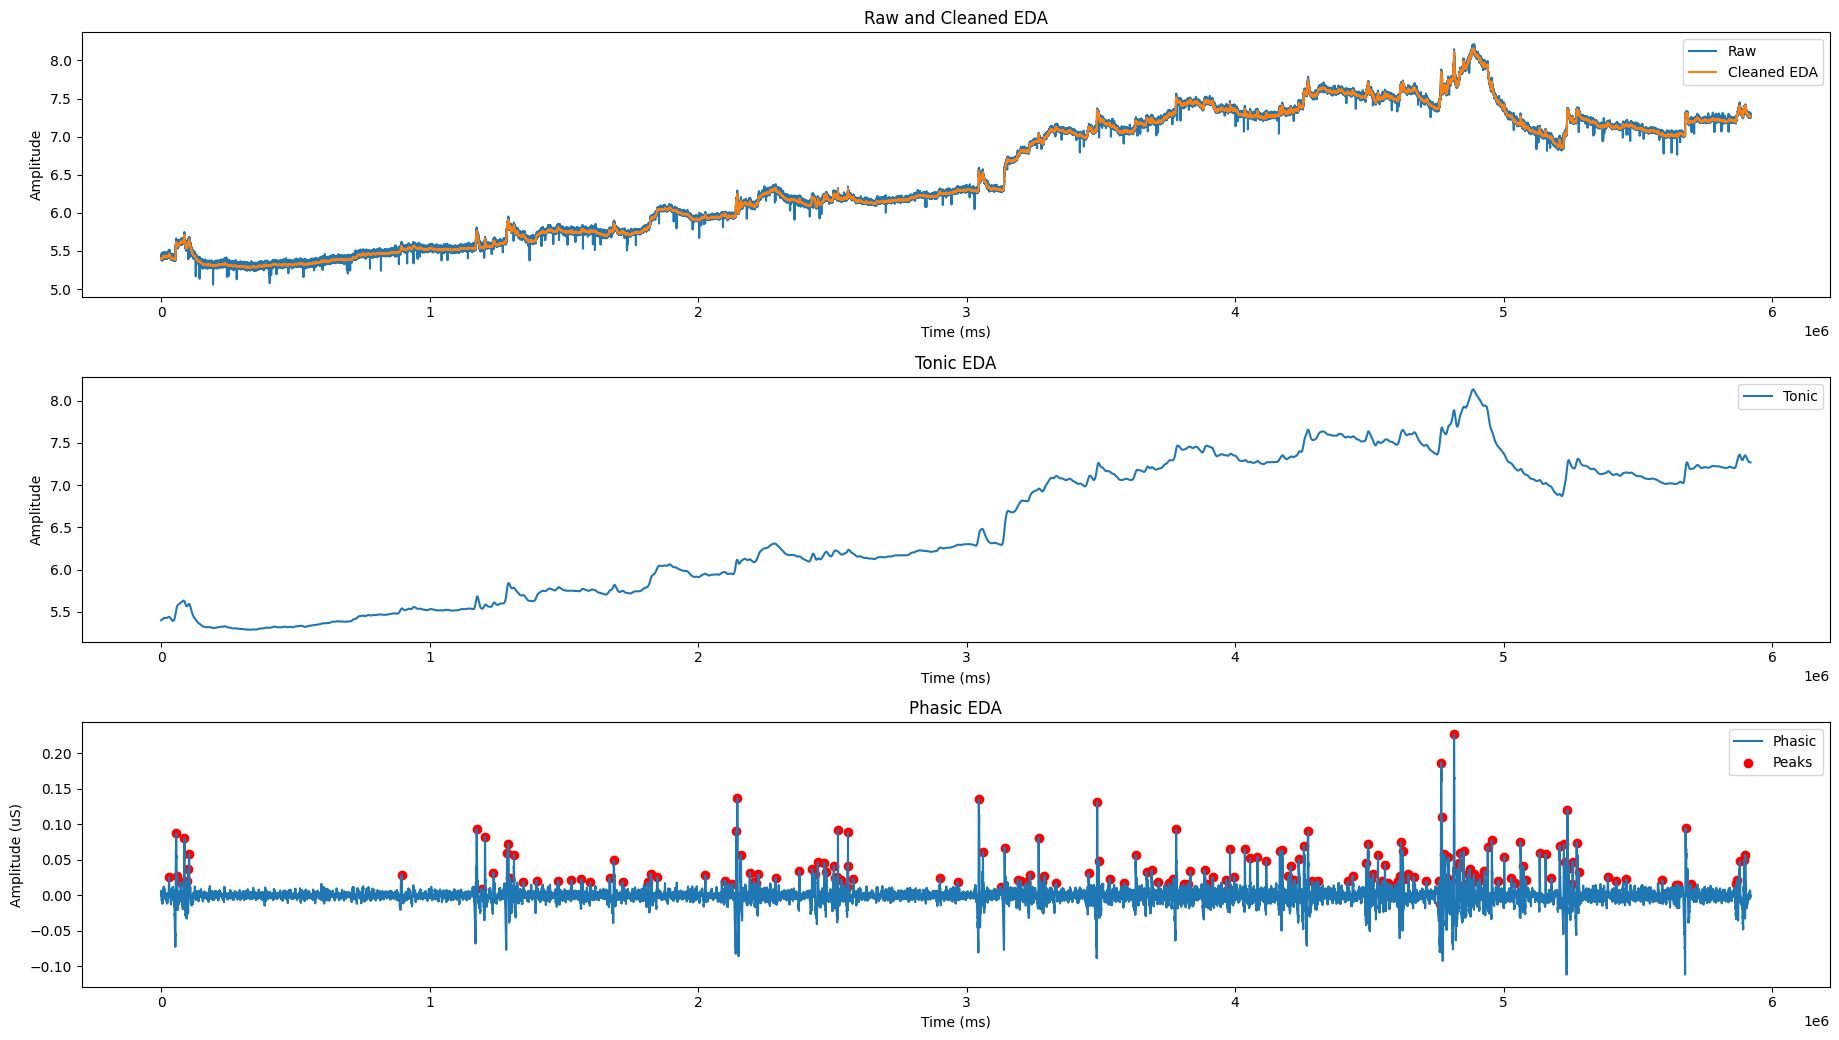

In [8]:
biobss.edatools.eda_plot(signals={'Raw':eda_raw,'Cleaned':eda_cleaned,'Tonic':tonic,'Phasic':phasic,'Peaks':peaks},sampling_rate=700)